电商平台零售数据分析

提出问题

●项目背景

●此次项目数据来自Kaggle,包含了2010年12月1日至2011年12月9日在英国注册的非实体网上零

售发生的所有交易。公司主要销售独特的全天候礼品。该公司的许多客户都是批发商。
分析目的

●用户分类(RFM模型) ,对比分析不同用户群体在时间、地区等维度下交易量,交易金额指标，并根据分析结果提出优化建议。


In [50]:
#忽略警告提示
import warnings
warnings.filterwarnings('ignore')
#导入处理数据包
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
# os.chdir(r'C:\Users\Administrator\Desktop')
os.chdir('./')


In [51]:
#通过感叹号执行系统命令
!pwd
!ls

/e/24PythonCode/24python/49_day/project
1 鏁版嵁鍒嗘瀽娴佺▼.ipynb
2 鐢靛晢鏁版嵁鍒嗘瀽.ipynb
data.csv
jupyter瀹夎��.txt


In [52]:
#导入可视化库
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode()#初始化步骤
pyplot = py.offline.iplot #画图函数


In [53]:
#读取数据,读数据时可以特别指定某一列的类型
df  = pd.read_csv('data.csv',encoding='ISO-8859-1',dtype={'CustomerID':str})

In [54]:
df.describe()

Quantity      UnitPrice
count  541909.000000  541909.000000
mean        9.552250       4.611114
std       218.081158      96.759853
min    -80995.000000  -11062.060000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max     80995.000000   38970.000000

In [55]:
df.shape

(541909, 8)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


●字段解释:
InvoiceNo-->订单号码: 6位字符串

StockCode -->产品代码: 6位字符串

Description-->产品描述

Quantity-->产品数量:交易产品数量

InvoiceDate-->订单日期:订单发生的日期和时间

UnitPrice-->单价:浮点数值

CustomerlD -->顾客ID: 5位字符串

Country-->国家:客户所在地

In [57]:
#统计缺失率，可以看到只有Description、CustomerID字段有缺失
df.apply(lambda x: sum(x.isnull())/len(x), axis=0)

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

In [58]:
# Description字段对于分析结果影响不大，选择直接删除该列
df.drop(['Description'],axis=1,inplace=True) 
# CustomerID字段为客户编号，不能直接删除，选择填充为U (表示未知)
# df['CustomerID'] = df['CustomerID'].fillna('U')

In [59]:
df

InvoiceNo StockCode  Quantity      InvoiceDate  UnitPrice CustomerID  \
0         536365    85123A         6   12/1/2010 8:26       2.55      17850   
1         536365     71053         6   12/1/2010 8:26       3.39      17850   
2         536365    84406B         8   12/1/2010 8:26       2.75      17850   
3         536365    84029G         6   12/1/2010 8:26       3.39      17850   
4         536365    84029E         6   12/1/2010 8:26       3.39      17850   
...          ...       ...       ...              ...        ...        ...   
541904    581587     22613        12  12/9/2011 12:50       0.85      12680   
541905    581587     22899         6  12/9/2011 12:50       2.10      12680   
541906    581587     23254         4  12/9/2011 12:50       4.15      12680   
541907    581587     23255         4  12/9/2011 12:50       4.15      12680   
541908    581587     22138         3  12/9/2011 12:50       4.95      12680   

               Country  
0       United Kingdom  
1       United Kingdom  
2       United Kingdom  
3       United Kingdom  
4       United Kingdom  
...                ...  
541904          France  
541905          France  
541906          France  
541907          France  
541908          France  

[541909 rows x 7 columns]

In [60]:
df.dropna(inplace=True) #如果用户ID为空，就删除对应行

In [61]:
df

InvoiceNo StockCode  Quantity      InvoiceDate  UnitPrice CustomerID  \
0         536365    85123A         6   12/1/2010 8:26       2.55      17850   
1         536365     71053         6   12/1/2010 8:26       3.39      17850   
2         536365    84406B         8   12/1/2010 8:26       2.75      17850   
3         536365    84029G         6   12/1/2010 8:26       3.39      17850   
4         536365    84029E         6   12/1/2010 8:26       3.39      17850   
...          ...       ...       ...              ...        ...        ...   
541904    581587     22613        12  12/9/2011 12:50       0.85      12680   
541905    581587     22899         6  12/9/2011 12:50       2.10      12680   
541906    581587     23254         4  12/9/2011 12:50       4.15      12680   
541907    581587     23255         4  12/9/2011 12:50       4.15      12680   
541908    581587     22138         3  12/9/2011 12:50       4.95      12680   

               Country  
0       United Kingdom  
1       United Kingdom  
2       United Kingdom  
3       United Kingdom  
4       United Kingdom  
...                ...  
541904          France  
541905          France  
541906          France  
541907          France  
541908          France  

[406829 rows x 7 columns]

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Quantity     406829 non-null  int64  
 3   InvoiceDate  406829 non-null  object 
 4   UnitPrice    406829 non-null  float64
 5   CustomerID   406829 non-null  object 
 6   Country      406829 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 24.8+ MB


In [63]:
df.head(10)

InvoiceNo StockCode  Quantity     InvoiceDate  UnitPrice CustomerID  \
0    536365    85123A         6  12/1/2010 8:26       2.55      17850   
1    536365     71053         6  12/1/2010 8:26       3.39      17850   
2    536365    84406B         8  12/1/2010 8:26       2.75      17850   
3    536365    84029G         6  12/1/2010 8:26       3.39      17850   
4    536365    84029E         6  12/1/2010 8:26       3.39      17850   
5    536365     22752         2  12/1/2010 8:26       7.65      17850   
6    536365     21730         6  12/1/2010 8:26       4.25      17850   
7    536366     22633         6  12/1/2010 8:28       1.85      17850   
8    536366     22632         6  12/1/2010 8:28       1.85      17850   
9    536367     84879        32  12/1/2010 8:34       1.69      13047   

          Country  
0  United Kingdom  
1  United Kingdom  
2  United Kingdom  
3  United Kingdom  
4  United Kingdom  
5  United Kingdom  
6  United Kingdom  
7  United Kingdom  
8  United Kingdom  
9  United Kingdom

●为方便后续分析，将订单日期拆分，增加年月日时间四个字段；增加合计购买字段;

In [64]:
#增加合计购买金额 (amount) =数量*金额
df['amount']= df['Quantity']*df['UnitPrice']

In [65]:
df

InvoiceNo StockCode  Quantity      InvoiceDate  UnitPrice CustomerID  \
0         536365    85123A         6   12/1/2010 8:26       2.55      17850   
1         536365     71053         6   12/1/2010 8:26       3.39      17850   
2         536365    84406B         8   12/1/2010 8:26       2.75      17850   
3         536365    84029G         6   12/1/2010 8:26       3.39      17850   
4         536365    84029E         6   12/1/2010 8:26       3.39      17850   
...          ...       ...       ...              ...        ...        ...   
541904    581587     22613        12  12/9/2011 12:50       0.85      12680   
541905    581587     22899         6  12/9/2011 12:50       2.10      12680   
541906    581587     23254         4  12/9/2011 12:50       4.15      12680   
541907    581587     23255         4  12/9/2011 12:50       4.15      12680   
541908    581587     22138         3  12/9/2011 12:50       4.95      12680   

               Country  amount  
0       United Kingdom   15.30  
1       United Kingdom   20.34  
2       United Kingdom   22.00  
3       United Kingdom   20.34  
4       United Kingdom   20.34  
...                ...     ...  
541904          France   10.20  
541905          France   12.60  
541906          France   16.60  
541907          France   16.60  
541908          France   14.85  

[406829 rows x 8 columns]

In [66]:
#订单日期切分
df['date']=[x.split(' ')[0] for x in df['InvoiceDate']]  #取日期
df['time']=[x.split(' ')[1] for x in df['InvoiceDate']]  #取时间
df.drop(columns=['InvoiceDate'],axis=1,inplace=True)  #删除原有的字符串的日期时间列

In [67]:
df.head()

InvoiceNo StockCode  Quantity  UnitPrice CustomerID         Country  amount  \
0    536365    85123A         6       2.55      17850  United Kingdom   15.30   
1    536365     71053         6       3.39      17850  United Kingdom   20.34   
2    536365    84406B         8       2.75      17850  United Kingdom   22.00   
3    536365    84029G         6       3.39      17850  United Kingdom   20.34   
4    536365    84029E         6       3.39      17850  United Kingdom   20.34   

        date  time  
0  12/1/2010  8:26  
1  12/1/2010  8:26  
2  12/1/2010  8:26  
3  12/1/2010  8:26  
4  12/1/2010  8:26

In [68]:
df.dtypes

InvoiceNo      object
StockCode      object
Quantity        int64
UnitPrice     float64
CustomerID     object
Country        object
amount        float64
date           object
time           object
dtype: object

In [69]:
df['year']=[x.split('/')[2] for x in df['date']]  #拿年
df['month']=[x.split('/')[0] for x in df['date']]  #拿月
df['day']=[x.split('/')[1] for x in df['date']]   #拿天
#转换日期格式
df['date'] = pd.to_datetime(df['date'])
print(df.shape)
df.head()

(406829, 12)


InvoiceNo StockCode  Quantity  UnitPrice CustomerID         Country  amount  \
0    536365    85123A         6       2.55      17850  United Kingdom   15.30   
1    536365     71053         6       3.39      17850  United Kingdom   20.34   
2    536365    84406B         8       2.75      17850  United Kingdom   22.00   
3    536365    84029G         6       3.39      17850  United Kingdom   20.34   
4    536365    84029E         6       3.39      17850  United Kingdom   20.34   

        date  time  year month day  
0 2010-12-01  8:26  2010    12   1  
1 2010-12-01  8:26  2010    12   1  
2 2010-12-01  8:26  2010    12   1  
3 2010-12-01  8:26  2010    12   1  
4 2010-12-01  8:26  2010    12   1

In [70]:
df.dtypes

InvoiceNo             object
StockCode             object
Quantity               int64
UnitPrice            float64
CustomerID            object
Country               object
amount               float64
date          datetime64[ns]
time                  object
year                  object
month                 object
day                   object
dtype: object

In [88]:
#重复值处理，删除重复行,重复的是系统错误，或人工操作出错
df = df.drop_duplicates()
df.shape

(401602, 12)

In [89]:
#异常的处理
#通过观察平均值和中值的差异来判断是否有异常数据
df.describe()

Quantity      UnitPrice         amount  \
count  401602.000000  401602.000000  401602.000000   
mean       12.182579       3.474064      20.612366   
min    -80995.000000       0.000000 -168469.600000   
25%         2.000000       1.250000       4.250000   
50%         5.000000       1.950000      11.700000   
75%        12.000000       3.750000      19.800000   
max     80995.000000   38970.000000  168469.600000   
std       250.283248      69.764209     430.352519   

                                date  
count                         401602  
mean   2011-07-09 22:53:52.633303552  
min              2010-12-01 00:00:00  
25%              2011-04-06 00:00:00  
50%              2011-07-29 00:00:00  
75%              2011-10-20 00:00:00  
max              2011-12-09 00:00:00  
std                              NaN

# 四、数据分析

# 1.退货订单分析

In [131]:
#查看数据发现商品数量和单价存在负值。进一步查看异常数据。不能为负值的特征，有负值的去掉
#商品数量异常，其实就是退货
df1 = df.loc[df['Quantity'] <= 0]
print('异常数据比例:',df1.shape[0]/df.shape[0])
df1

异常数据比例: 0.022091523448588404


InvoiceNo StockCode  Quantity  UnitPrice CustomerID         Country  \
141      C536379         D        -1      27.50      14527  United Kingdom   
154      C536383    35004C        -1       4.65      15311  United Kingdom   
235      C536391     22556       -12       1.65      17548  United Kingdom   
236      C536391     21984       -24       0.29      17548  United Kingdom   
237      C536391     21983       -24       0.29      17548  United Kingdom   
...          ...       ...       ...        ...        ...             ...   
540449   C581490     23144       -11       0.83      14397  United Kingdom   
541541   C581499         M        -1     224.69      15498  United Kingdom   
541715   C581568     21258        -5      10.95      15311  United Kingdom   
541716   C581569     84978        -1       1.25      17315  United Kingdom   
541717   C581569     20979        -5       1.25      17315  United Kingdom   

        amount       date   time  year month day  
141     -27.50 2010-12-01   9:41  2010    12   1  
154      -4.65 2010-12-01   9:49  2010    12   1  
235     -19.80 2010-12-01  10:24  2010    12   1  
236      -6.96 2010-12-01  10:24  2010    12   1  
237      -6.96 2010-12-01  10:24  2010    12   1  
...        ...        ...    ...   ...   ...  ..  
540449   -9.13 2011-12-09   9:57  2011    12   9  
541541 -224.69 2011-12-09  10:28  2011    12   9  
541715  -54.75 2011-12-09  11:57  2011    12   9  
541716   -1.25 2011-12-09  11:58  2011    12   9  
541717   -6.25 2011-12-09  11:58  2011    12   9  

[8872 rows x 12 columns]

In [83]:
df1.head()

InvoiceNo StockCode  Quantity  UnitPrice CustomerID         Country  \
141   C536379         D        -1      27.50      14527  United Kingdom   
154   C536383    35004C        -1       4.65      15311  United Kingdom   
235   C536391     22556       -12       1.65      17548  United Kingdom   
236   C536391     21984       -24       0.29      17548  United Kingdom   
237   C536391     21983       -24       0.29      17548  United Kingdom   

     amount       date   time  year month day  
141  -27.50 2010-12-01   9:41  2010    12   1  
154   -4.65 2010-12-01   9:49  2010    12   1  
235  -19.80 2010-12-01  10:24  2010    12   1  
236   -6.96 2010-12-01  10:24  2010    12   1  
237   -6.96 2010-12-01  10:24  2010    12   1

In [90]:
df1.tail()

InvoiceNo StockCode  Quantity  UnitPrice CustomerID         Country  \
540449   C581490     23144       -11       0.83      14397  United Kingdom   
541541   C581499         M        -1     224.69      15498  United Kingdom   
541715   C581568     21258        -5      10.95      15311  United Kingdom   
541716   C581569     84978        -1       1.25      17315  United Kingdom   
541717   C581569     20979        -5       1.25      17315  United Kingdom   

        amount       date   time  year month day  
540449   -9.13 2011-12-09   9:57  2011    12   9  
541541 -224.69 2011-12-09  10:28  2011    12   9  
541715  -54.75 2011-12-09  11:57  2011    12   9  
541716   -1.25 2011-12-09  11:58  2011    12   9  
541717   -6.25 2011-12-09  11:58  2011    12   9

In [92]:
df1.shape

(8872, 12)

In [93]:
# 退货金额占总销售金额的比例
np.abs(df1['amount'].sum()/df.loc[df['Quantity'] > 0]['amount'].sum())

0.06849476321480963

In [99]:
print(df1['amount'].sum())
print(df[df['Quantity'] > 0]['amount'].sum())

-608689.47
8886657.043999998


### 退货的超级透视

In [106]:
#退货合计金额
#margins=True 会给一个All的汇总
tt=pd.pivot_table(df1,index=['year'],columns=['month'], values=['amount'],aggfunc={'amount':np.sum},margins=True)
tt

amount                                                               \
month         1        10        11         12         2         3         4   
year                                                                           
2010        NaN       NaN       NaN  -18049.87       NaN       NaN       NaN   
2011  -94369.41 -62336.07 -29390.54 -175651.01 -10550.85 -15505.55 -43151.66   
All   -94369.41 -62336.07 -29390.54 -193700.88 -10550.85 -15505.55 -43151.66   

                                                                    
month         5         6         7         8         9        All  
year                                                                
2010        NaN       NaN       NaN       NaN       NaN  -18049.87  
2011  -30343.48 -53183.53 -25850.58 -28972.95 -21333.97 -590639.60  
All   -30343.48 -53183.53 -25850.58 -28972.95 -21333.97 -608689.47

In [124]:
tt=pd.pivot_table(df1,index=['year'],columns=['month'], values=['amount'],aggfunc={'amount':np.sum},margins=False)
tt

amount                                                               \
month         1        10        11         12         2         3         4   
year                                                                           
2010        NaN       NaN       NaN  -18049.87       NaN       NaN       NaN   
2011  -94369.41 -62336.07 -29390.54 -175651.01 -10550.85 -15505.55 -43151.66   

                                                         
month         5         6         7         8         9  
year                                                     
2010        NaN       NaN       NaN       NaN       NaN  
2011  -30343.48 -53183.53 -25850.58 -28972.95 -21333.97

In [113]:
sale_returned=tt.iloc[0:2].fillna(0)
sale_returned

amount                                                               \
month         1        10        11         12         2         3         4   
year                                                                           
2010       0.00      0.00      0.00  -18049.87      0.00      0.00      0.00   
2011  -94369.41 -62336.07 -29390.54 -175651.01 -10550.85 -15505.55 -43151.66   

                                                         
month         5         6         7         8         9  
year                                                     
2010       0.00      0.00      0.00      0.00      0.00  
2011  -30343.48 -53183.53 -25850.58 -28972.95 -21333.97

### 销售额和退货是否有关系

In [114]:
#合计金额,margins代表是否做汇总，是否有all
df2 = df[(df['Quantity'] > 0)&(df['UnitPrice'] > 0)]
pp = pd.pivot_table(df2,index=['year'],columns=['month'],values=['amount'],aggfunc={'amount':np.sum},margins=False)
sale = pp.iloc[0:2]
sale=sale.fillna(0)
sale

amount                                                           \
month          1          10          11         12          2          3   
year                                                                        
2010        0.00        0.00        0.00  570422.73       0.00       0.00   
2011   568101.31  1035642.45  1155668.61  517190.44  446084.92  594081.76   

                                                                           
month           4         5          6           7          8           9  
year                                                                       
2010        0.000       0.0       0.00       0.000       0.00       0.000  
2011   468374.331  677340.3  660046.05  598962.901  644051.04  950690.202

In [115]:
#看一个跟退货相关的用户ID，发现退货的用户，他购买过商品
df2[df2['CustomerID']=='17315']

InvoiceNo StockCode  Quantity  UnitPrice CustomerID         Country  \
34524     539404     21528         1       6.95      17315  United Kingdom   
34525     539404     22720         1       4.95      17315  United Kingdom   
34526     539404     21329         1       1.65      17315  United Kingdom   
34527     539404     22961         1       1.45      17315  United Kingdom   
34528     539404     21389         1       0.85      17315  United Kingdom   
...          ...       ...       ...        ...        ...             ...   
537794    581345     85059         2       3.75      17315  United Kingdom   
537795    581345     22495         2       0.79      17315  United Kingdom   
537796    581345     22500         2       1.25      17315  United Kingdom   
537798    581345     22698         9       2.95      17315  United Kingdom   
537799    581345     22699        10       2.95      17315  United Kingdom   

        amount       date   time  year month day  
34524     6.95 2010-12-17  12:24  2010    12  17  
34525     4.95 2010-12-17  12:24  2010    12  17  
34526     1.65 2010-12-17  12:24  2010    12  17  
34527     1.45 2010-12-17  12:24  2010    12  17  
34528     0.85 2010-12-17  12:24  2010    12  17  
...        ...        ...    ...   ...   ...  ..  
537794    7.50 2011-12-08  12:15  2011    12   8  
537795    1.58 2011-12-08  12:15  2011    12   8  
537796    2.50 2011-12-08  12:15  2011    12   8  
537798   26.55 2011-12-08  12:15  2011    12   8  
537799   29.50 2011-12-08  12:15  2011    12   8  

[471 rows x 12 columns]

In [116]:
df2.count()

InvoiceNo     392690
StockCode     392690
Quantity      392690
UnitPrice     392690
CustomerID    392690
Country       392690
amount        392690
date          392690
time          392690
year          392690
month         392690
day           392690
dtype: int64

In [123]:
# 退货金额占比
rate = tt/pp
print(rate)

         amount                                                            \
month         1        10        11        12         2       3         4   
year                                                                        
2010        NaN       NaN       NaN -0.031643       NaN     NaN       NaN   
2011  -0.166114 -0.060191 -0.025432 -0.339625 -0.023652 -0.0261 -0.092131   

                                                         
month         5         6         7         8         9  
year                                                     
2010        NaN       NaN       NaN       NaN       NaN  
2011  -0.044798 -0.080575 -0.043159 -0.044985 -0.022441  


In [125]:
# 2011的平均退货率
print(np.abs(rate).loc['2011'].mean())
print('-'*50)
print(np.abs(rate))

0.08076688902442004
--------------------------------------------------
         amount                                                            \
month         1        10        11        12         2       3         4   
year                                                                        
2010        NaN       NaN       NaN  0.031643       NaN     NaN       NaN   
2011   0.166114  0.060191  0.025432  0.339625  0.023652  0.0261  0.092131   

                                                         
month         5         6         7         8         9  
year                                                     
2010        NaN       NaN       NaN       NaN       NaN  
2011   0.044798  0.080575  0.043159  0.044985  0.022441  


●可以看到，退货率最高为2011年1月和12月，将结果可视化,这是额外作业

●2011年1月和12月退货率均高于平均退货率9%。特别是2011年12月，
具体情况成与相关部门沟通是什么原因导致，并且分析前几年的退货
率，是否存在同样的问题。因为可能是圣诞节购物较多

# 2、用户分类

RFM模型是衡星客户价值和客户创利能力的重要工具和手段。通过一个客户的近期购买行为、购买的总体频率以及花了多少钱三项指标来描该客户的价值状况。

●R:最近一次消费时间(最近一次消费到参考时间的间隔)

●F:消费的频次(消费了多少次)

●M:消费的金额(总消费金额)

In [133]:
# 把退货、赠品样本去掉，只分析真正产生销售额的样本
df2 = df[(df['Quantity'] > 0)&(df['UnitPrice'] > 0)]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392690 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   InvoiceNo   392690 non-null  object        
 1   StockCode   392690 non-null  object        
 2   Quantity    392690 non-null  int64         
 3   UnitPrice   392690 non-null  float64       
 4   CustomerID  392690 non-null  object        
 5   Country     392690 non-null  object        
 6   amount      392690 non-null  float64       
 7   date        392690 non-null  datetime64[ns]
 8   time        392690 non-null  object        
 9   year        392690 non-null  object        
 10  month       392690 non-null  object        
 11  day         392690 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 38.9+ MB


In [134]:
# 先看一下有多少个用户
df2.groupby('CustomerID')['date'].count().shape

(4338,)

## 客户最近一次消费时间

In [135]:
#客户最近一次消费时间,直接找日期的最大值即可,把df2['date'].max()日期中最大的作为参照
R_value=df2.groupby('CustomerID')['date'].max()
print(R_value)

CustomerID
12346   2011-01-18
12347   2011-12-07
12348   2011-09-25
12349   2011-11-21
12350   2011-02-02
           ...    
18280   2011-03-07
18281   2011-06-12
18282   2011-12-02
18283   2011-12-06
18287   2011-10-28
Name: date, Length: 4338, dtype: datetime64[ns]


In [139]:
# 最后一单的日期，以此作为基准
print(df2['date'].max())

2011-12-09 00:00:00


In [140]:
# 计算客户最后一次消费距离截止日期的天数，datetime类型相减时，会得到天数、月份，非常好
print(df2['date'].max()- R_value)
print('-'*50)

R = (df2['date'].max()- R_value).dt.days  #拿到时间值，int64，方便运算
print(R)

CustomerID
12346   325 days
12347     2 days
12348    75 days
12349    18 days
12350   310 days
          ...   
18280   277 days
18281   180 days
18282     7 days
18283     3 days
18287    42 days
Name: date, Length: 4338, dtype: timedelta64[ns]
--------------------------------------------------
CustomerID
12346    325
12347      2
12348     75
12349     18
12350    310
        ... 
18280    277
18281    180
18282      7
18283      3
18287     42
Name: date, Length: 4338, dtype: int64


## 客户消费频率

In [152]:
# 客户消费频率，nunique是去重后计算个数
F = df2.groupby('CustomerID')['InvoiceNo'].nunique()  #得到了消费频次
print(F)

CustomerID
12346     1
12347     7
12348     4
12349     1
12350     1
         ..
18280     1
18281     1
18282     2
18283    16
18287     3
Name: InvoiceNo, Length: 4338, dtype: int64


## 客户消费金额

In [154]:
#客户消费金额
M = df2.groupby('CustomerID')['amount'].sum()
print(M)

CustomerID
12346    77183.60
12347     4310.00
12348     1797.24
12349     1757.55
12350      334.40
           ...   
18280      180.60
18281       80.82
18282      178.05
18283     2045.53
18287     1837.28
Name: amount, Length: 4338, dtype: float64


●分别查看R/F/M值，对其设置合理阈值，进行分层

In [155]:
R.describe()

count    4338.000000
mean       92.059474
std       100.012264
min         0.000000
25%        17.000000
50%        50.000000
75%       141.750000
max       373.000000
Name: date, dtype: float64

In [164]:
import seaborn as sns
sns.set(style='darkgrid',context='notebook',font_scale=1.2)# 设置背景
# 支持中文显示
plt.figure(figsize=(10,4))
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.hist(R,bins =30) 
plt.show()

●可以看到，截止2011年12月9日，最后一次消费距离截止日期的天数平均为92天，标准差为100,波动较大。距离天数最大超过一年。

In [166]:
F.describe()

count    4338.000000
mean        4.272015
std         7.697998
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       209.000000
Name: InvoiceNo, dtype: float64

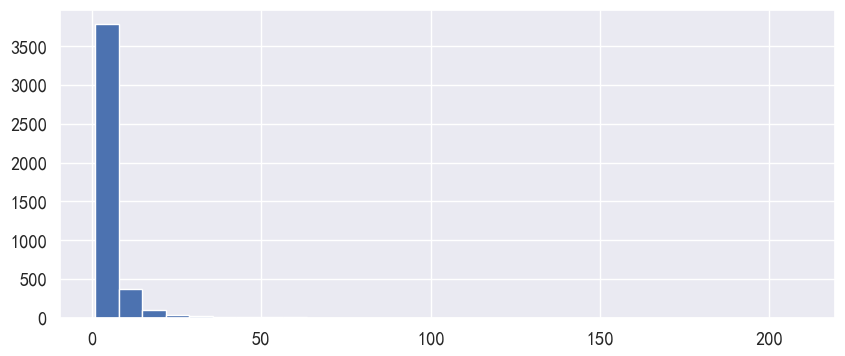

In [169]:
plt.figure(figsize=(10,4))
plt.hist(F,bins =30)
plt.show()

In [36]:
F[F<30].count()/F.count()   # 购买次数在30次以下的用户占绝大多数

0.9891680110624568

In [46]:
F[F==7]

CustomerID
12347    7
12433    7
12457    7
12472    7
12494    7
        ..
17937    7
17988    7
18094    7
18230    7
18245    7
Name: InvoiceNo, Length: 143, dtype: int64

●由于极值的影响，可视化不明显。

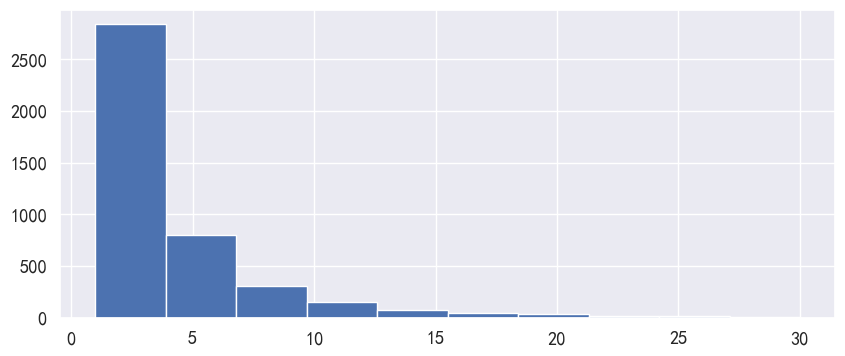

In [171]:
# 查看频次小于30的
plt.figure(figsize=(10,4))
plt.hist(F[F<=30],bins =10)
plt.show()

In [172]:
M.describe()

count      4338.000000
mean       2048.560868
std        8984.682547
min           3.750000
25%         306.482500
50%         668.570000
75%        1660.597500
max      280206.020000
Name: amount, dtype: float64

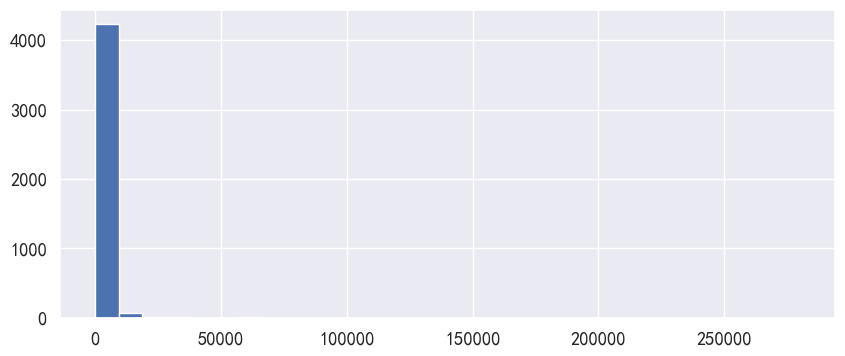

In [174]:
plt.figure(figsize=(10,4))
plt.hist(M,bins =30)
plt.show()

In [177]:
M[M<8000].count()/M.count()

0.9686491470723836

In [178]:
plt.figure(figsize=(10,4))
plt.hist(M[M<8000],bins=100)
plt.show()

# 针对之前的分析，对用户进行分级

In [183]:
import pandas as pd
import numpy as np
s = pd.Series(np.array([1, 3, 6, 8, 9]),
              index=['a', 'b', 'c', 'd', 'e'])
s

a    1
b    3
c    6
d    8
e    9
dtype: int32

In [187]:
#左闭右开
pd.cut(s, [0, 2, 4, 6, 8, 10], labels=[5,4,3,2,1], right=False) # Series

a    5
b    4
c    2
d    1
e    1
dtype: category
Categories (5, int64): [5 < 4 < 3 < 2 < 1]

In [193]:
R_bins = [0,30,90,180,360,720]  #越小越好，刚来消费过的用户价值较高
F_bins = [1,2,5,10,20,500]  #越大越好
M_bins = [0,500,2000,5000,10000,300000] #越大越好

#数据离散化
R_score = pd.cut(R,R_bins, labels = [5,4,3,2,1], right=False)
F_score = pd.cut(F,F_bins, labels = [1,2,3,4,5], right=False)
M_score = pd.cut(M,M_bins, labels = [1,2,3,4,5], right=False)

In [194]:
print(R_score)

CustomerID
12346    2
12347    5
12348    4
12349    5
12350    2
        ..
18280    2
18281    2
18282    5
18283    5
18287    4
Name: date, Length: 4338, dtype: category
Categories (5, int64): [5 < 4 < 3 < 2 < 1]


In [191]:
print(F_score)

CustomerID
12346    1
12347    3
12348    2
12349    1
12350    1
        ..
18280    1
18281    1
18282    2
18283    4
18287    2
Name: InvoiceNo, Length: 4338, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]


In [192]:
print(M_score)

CustomerID
12346    5
12347    3
12348    2
12349    2
12350    1
        ..
18280    1
18281    1
18282    1
18283    3
18287    2
Name: amount, Length: 4338, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]


In [197]:
rfm = pd.concat([R_score,F_score,M_score],axis=1) #数据合并
print(rfm)

           date InvoiceNo amount
CustomerID                      
12346         2         1      5
12347         5         3      3
12348         4         2      2
12349         5         1      2
12350         2         1      1
...         ...       ...    ...
18280         2         1      1
18281         2         1      1
18282         5         2      1
18283         5         4      3
18287         4         2      2

[4338 rows x 3 columns]


In [198]:
rfm.info()  # 通过cut分到的12345分，不是int，而是category，类别类型

<class 'pandas.core.frame.DataFrame'>
Index: 4338 entries, 12346 to 18287
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   date       4338 non-null   category
 1   InvoiceNo  4338 non-null   category
 2   amount     4338 non-null   category
dtypes: category(3)
memory usage: 47.2+ KB


In [201]:
#通过rename接口，用字典去修改columns索引
rfm.rename(columns={'date':'R_score','InvoiceNo':'F_score','amount':'M_score'},inplace = True)

In [203]:
rfm.head(n=50)

R_score F_score M_score
CustomerID                        
12346            2       1       5
12347            5       3       3
12348            4       2       2
12349            5       1       2
12350            2       1       1
12352            4       3       3
12353            2       1       1
12354            2       1       2
12355            2       1       1
12356            5       2       3
12357            4       1       4
12358            5       2       2
12359            4       2       4
12360            4       2       3
12361            2       1       1
12362            5       4       4
12363            3       2       2
12364            5       2       2
12365            2       2       2
12367            5       1       1
12370            4       2       3
12371            4       2       2
12372            4       2       2
12373            2       1       1
12374            5       1       2
12375            5       2       1
12377            2       2       2
12378            3       1       3
12379            4       2       2
12380            5       2       3
12381            5       3       2
12383            2       3       2
12384            5       2       2
12386            2       2       1
12388            5       3       3
12390            4       1       2
12391            5       1       1
12393            4       2       2
12394            4       2       2
12395            5       4       3
12397            4       2       3
12398            4       1       2
12399            3       2       2
12401            2       1       1
12402            2       1       1
12403            4       1       1
12405            3       1       2
12406            5       2       3
12407            4       3       2
12408            4       3       3

In [204]:
rfm.dtypes

R_score    category
F_score    category
M_score    category
dtype: object

In [205]:
# 将category类型转换为float类型
for i in ['R_score','F_score','M_score']:
    rfm[i] = rfm[i].astype(float)
# 整体转化，和上面等价
#rfm=rfm.astype(float)

In [206]:
rfm.dtypes

R_score    float64
F_score    float64
M_score    float64
dtype: object

In [207]:
rfm.describe()

R_score      F_score      M_score
count  4338.000000  4338.000000  4338.000000
mean      3.821346     2.027432     1.887045
std       1.174880     0.997083     0.953937
min       1.000000     1.000000     1.000000
25%       3.000000     1.000000     1.000000
50%       4.000000     2.000000     2.000000
75%       5.000000     3.000000     2.000000
max       5.000000     5.000000     5.000000

numpy.where(condition, [x, y])
condition: 一个布尔数组，表示要满足的条件。
x: 一个数组，当条件 condition 为真时返回的值。
y: 一个数组，当条件 condition 为假时返回的值。

由于 np.where 可以处理 NumPy 数组， rfm['R_score'] 是一个 Pandas Series，它会被隐式地转换为一个 NumPy 数组。
np.where 函数返回的结果将是一个与条件数组等长的 NumPy 数组，数组中的元素将是字符串 '高' 或 '低'。

因此，rfm['R'] 将是一个由字符串组成的 Pandas Series，其中的值根据 R_score 的条件被设置为 '高' 或 '低'。
这个新的 'R' 列会被添加到原有的 rfm DataFrame 中。

In [208]:
rfm['R'] = np.where(rfm['R_score']>3.82,'高','低')

In [209]:
rfm['F'] = np.where(rfm['F_score']>2.03,'高','低')

In [210]:
rfm['M'] = np.where(rfm['M_score']>1.89,'高','低')

In [212]:
rfm.head()

R_score  F_score  M_score  R  F  M
CustomerID                                    
12346           2.0      1.0      5.0  低  低  高
12347           5.0      3.0      3.0  高  高  高
12348           4.0      2.0      2.0  高  低  高
12349           5.0      1.0      2.0  高  低  高
12350           2.0      1.0      1.0  低  低  低

In [230]:
print(type(rfm['R'].str))
print(type(rfm['R']))
print(type(rfm['R'].str[:]))
rfm['R'].str[:]

<class 'pandas.core.strings.accessor.StringMethods'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


CustomerID
12346    低
12347    高
12348    高
12349    高
12350    低
        ..
18280    低
18281    低
18282    高
18283    高
18287    高
Name: R, Length: 4338, dtype: object

In [229]:
#rfm['value'] = rfm['R'] + rfm['F'] + rfm['M']  # 这俩效果一样
rfm['value'] = rfm['R'].str[:] + rfm['F'].str[:]+rfm['M'].str[:] #字符串拼接
# str 是一种访问 Pandas Series 中数据的方式，注意只是一种方式，类似dt
# 即把值当做字符串看待，[:]表示切片，切出来的仍是series
# 在 Pandas 的 Series 上使用 .str 访问器时，通常是为了访问字符串相关的特定方法或属性

In [227]:
rfm['value']

CustomerID
12346    低低高
12347    高高高
12348    高低高
12349    高低高
12350    低低低
        ... 
18280    低低低
18281    低低低
18282    高低低
18283    高高高
18287    高低高
Name: value, Length: 4338, dtype: object

In [231]:
rfm['value'] = rfm['value'].str.strip()#去除字符串空格

In [242]:
rfm.head()

R_score  F_score  M_score  R  F  M value    用户等级
CustomerID                                                  
12346           2.0      1.0      5.0  低  低  高   低低高  重要挽留客户
12347           5.0      3.0      3.0  高  高  高   高高高  重要价值客户
12348           4.0      2.0      2.0  高  低  高   高低高  重要发展客户
12349           5.0      1.0      2.0  高  低  高   高低高  重要发展客户
12350           2.0      1.0      1.0  低  低  低   低低低  一般挽留客户

In [234]:
# 8种等级的客户
def trans_value(x):
    if x=='高高高':
        return '重要价值客户'
    elif x =='高低高':
        return '重要发展客户'
    elif x =='低高高':
        return '重要保持客户'
    elif x =='低低高':
        return '重要挽留客户'
    elif x == '高高低':
        return '一般价值客户'
    elif x =='高低低':
        return '一般发展客户'
    elif x =='低高低':
        return '一般保持客户'
    else:
        return '一般挽留客户'

In [243]:
rfm['用户等级'] = rfm['value'].apply(trans_value)

In [244]:
rfm['用户等级'].value_counts()
# rfm.groupby('用户等级')['R_score'].count()    # 效果一样

用户等级
重要价值客户    1036
重要发展客户    1017
一般挽留客户     923
一般发展客户     829
重要挽留客户     455
重要保持客户      66
一般价值客户       7
一般保持客户       5
Name: count, dtype: int64

In [245]:
rfm.head()

R_score  F_score  M_score  R  F  M value    用户等级
CustomerID                                                  
12346           2.0      1.0      5.0  低  低  高   低低高  重要挽留客户
12347           5.0      3.0      3.0  高  高  高   高高高  重要价值客户
12348           4.0      2.0      2.0  高  低  高   高低高  重要发展客户
12349           5.0      1.0      2.0  高  低  高   高低高  重要发展客户
12350           2.0      1.0      1.0  低  低  低   低低低  一般挽留客户

In [246]:
#对结果可视化
trace_basic = [go.Bar(x =rfm['用户等级'].value_counts().index.tolist(),
                      y =rfm['用户等级'].value_counts().values.tolist(),
                      marker=dict(color='orange'),opacity=0.50)] #透明度
layout = go.Layout(title = '用户等级情况',xaxis =dict(title ='用户重要度'))
figure_basic = go.Figure(data = trace_basic,layout=layout)# data与layout组成一个图象对象
pyplot(figure_basic) #输出

In [248]:
trace = [go.Pie(labels = rfm['用户等级'].value_counts().index,values=rfm['用户等级'].value_counts().values,
                hole=0.2,
                textfont =dict(size=12,color ='white'))]
layout = go.Layout(title ='用户等级比例')
fig = go.Figure(data = trace,layout=layout) # data与layout组成一 个图象对象
pyplot(fig) #输出

# 五 结论和建议